In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input

In [4]:
def target_format(data):
  y1=data.pop('Y1')
  y1=np.array(y1)
  y2=data.pop('Y2')
  y2=np.array(y2)
  return y1,y2

In [5]:
def normalization(x):
  return (x-train_stats['mean'])/train_stats['std']


In [6]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
df = pd.read_excel(URL)
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.10,2,24.29,25.95
1,0.69,735.0,294.0,220.50,3.5,3,0.40,2,14.71,17.01
2,0.69,735.0,294.0,220.50,3.5,5,0.10,1,11.16,14.45
3,0.79,637.0,343.0,147.00,7.0,3,0.25,2,40.19,37.41
4,0.98,514.5,294.0,110.25,7.0,5,0.25,5,28.61,30.20


In [20]:
df.shape

(768, 10)

In [8]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [10]:
train,test=train_test_split(df,test_size=0.2)

In [11]:
train_stats=train.describe()

In [12]:
train_stats.pop('Y1')
train_stats.pop('Y2')

count    614.000000
mean      24.687280
std        9.542954
min       10.940000
25%       15.645000
50%       22.510000
75%       33.167500
max       48.030000
Name: Y2, dtype: float64

In [13]:
train_stats=train_stats.transpose()

In [14]:
train_y=target_format(train)
test_y=target_format(test)

In [15]:
norm_train_x=normalization(train)
norm_test_x=normalization(test)

In [17]:
input_layer=Input(shape=(len(train.columns),))
first_dense=Dense(128,activation='relu')(input_layer)
second_dense=Dense(128,activation='relu')(first_dense)
y1_output=Dense(1,name='y1_output')(second_dense)
third_dense=Dense(64,activation='relu')(second_dense)
y2_output=Dense(1,name='y2_output')(third_dense)

model=Model(inputs=input_layer,outputs=[y1_output,y2_output])
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          1152        input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 128)          16512       dense_3[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 64)           8256        dense_4[0][0]                    
____________________________________________________________________________________________

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(lr=0.001),
    loss={'y1_output':'mse','y2_output':'mse'},
    metrics={'y1_output':tf.keras.metrics.RootMeanSquaredError(),'y2_output':tf.keras.metrics.RootMeanSquaredError()}
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [22]:
history = model.fit(norm_train_x, train_y,
                    epochs=500, batch_size=10, validation_data=(norm_test_x, test_y))

Epoch 1/500
62/62 [==============================] - 3s 9ms/step - loss: 272.8126 - y1_output_loss: 129.7990 - y2_output_loss: 143.0135 - y1_output_root_mean_squared_error: 11.3929 - y2_output_root_mean_squared_error: 11.9588 - val_loss: 56.2579 - val_y1_output_loss: 23.1456 - val_y2_output_loss: 33.1123 - val_y1_output_root_mean_squared_error: 4.8110 - val_y2_output_root_mean_squared_error: 5.7543
Epoch 2/500
62/62 [==============================] - 0s 5ms/step - loss: 29.9115 - y1_output_loss: 12.1959 - y2_output_loss: 17.7156 - y1_output_root_mean_squared_error: 3.4923 - y2_output_root_mean_squared_error: 4.2090 - val_loss: 33.7137 - val_y1_output_loss: 10.6590 - val_y2_output_loss: 23.0547 - val_y1_output_root_mean_squared_error: 3.2648 - val_y2_output_root_mean_squared_error: 4.8015
Epoch 3/500
62/62 [==============================] - 0s 5ms/step - loss: 32.3057 - y1_output_loss: 10.9177 - y2_output_loss: 21.3879 - y1_output_root_mean_squared_error: 3.3042 - y2_output_root_mean_sq

In [27]:
import matplotlib.pyplot as plt

def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [28]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_x, y=test_y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 4ms/step - loss: 2.2316 - y1_output_loss: 0.5070 - y2_output_loss: 1.7246 - y1_output_root_mean_squared_error: 0.7121 - y2_output_root_mean_squared_error: 1.3132
Loss = 2.2316410541534424, Y1_loss = 0.5070177316665649, Y1_mse = 0.7120517492294312, Y2_loss = 1.7246230840682983, Y2_mse = 1.313249111175537


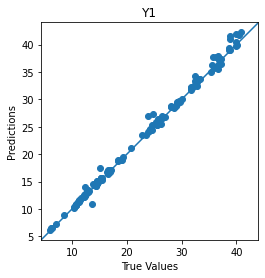

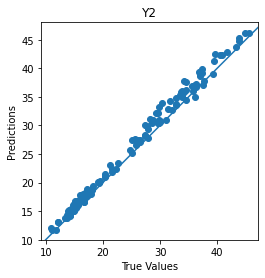

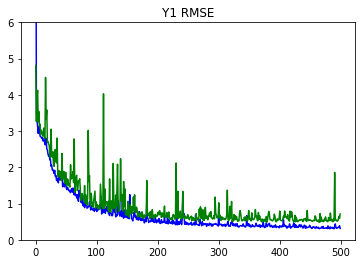

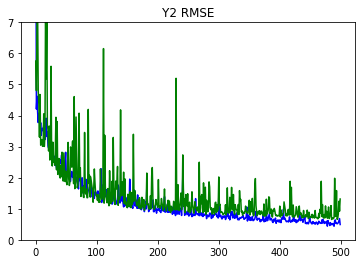

In [29]:
Y_pred = model.predict(norm_test_x)
plot_diff(test_y[0], Y_pred[0], title='Y1')
plot_diff(test_y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)